In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
# Only get data analyst jobs in Spain
df_DA_SP = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Spain')].copy()

Text(0, 0.5, 'Number of Jobs')

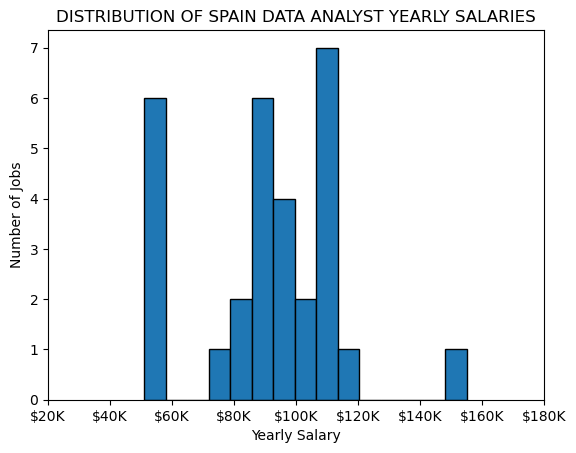

In [13]:
df_DA_SP['salary_year_avg'].plot(kind='hist', bins=15, edgecolor='black')
plt.xlim(20000, 180000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('DISTRIBUTION OF SPAIN DATA ANALYST YEARLY SALARIES')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
